In [ ]:
import os

import pandas as pd
import requests
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("EIA_API_KEY")
base_url = "https://api.eia.gov/v2/electricity/rto/region-data/data/"

params = {
    "api_key": api_key,
    "frequency": "hourly",
    "data[0]": "value",
    "facets[respondent][]": "CISO",
    "facets[type][]": ["D", "DF"],
    "start": "2025-01-01T00",
    "end": "2026-02-01T00",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000,
}

response = requests.get(base_url, params=params)

if response.status_code == 200:
    raw_data = response.json()["response"]["data"]
    df = pd.DataFrame(raw_data)

    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df["period"] = pd.to_datetime(df["period"])

    print(f"Total rows retrieved: {len(df)}")
    print(df.head())
else:
    print(f"Error {response.status_code}: {response.text}")

Total rows retrieved: 5000
               period respondent                         respondent-name type  \
0 2026-02-01 00:00:00       CISO  California Independent System Operator    D   
1 2026-02-01 00:00:00       CISO  California Independent System Operator   DF   
2 2026-01-31 23:00:00       CISO  California Independent System Operator    D   
3 2026-01-31 23:00:00       CISO  California Independent System Operator   DF   
4 2026-01-31 22:00:00       CISO  California Independent System Operator    D   

                   type-name  value    value-units  
0                     Demand  19910  megawatthours  
1  Day-ahead demand forecast  19910  megawatthours  
2                     Demand  18039  megawatthours  
3  Day-ahead demand forecast  18039  megawatthours  
4                     Demand  16654  megawatthours  


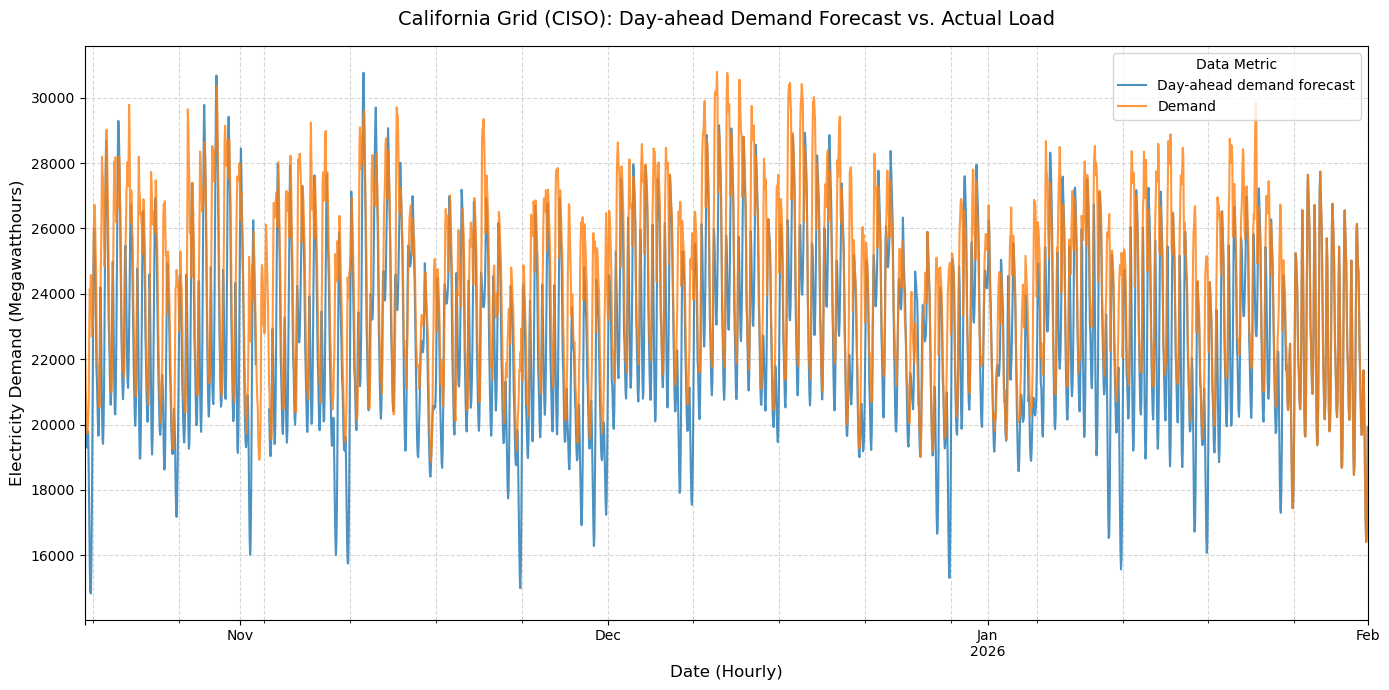

In [ ]:
import matplotlib.pyplot as plt

df_viz = df.pivot(index="period", columns="type-name", values="value")

plt.figure(figsize=(14, 7))
df_viz.plot(ax=plt.gca(), linewidth=1.5, alpha=0.8)

plt.title(
    "California Grid (CISO): Day-ahead Demand Forecast vs. Actual Load",
    fontsize=14,
    pad=15,
)
plt.ylabel("Electricity Demand (Megawatthours)", fontsize=12)
plt.xlabel("Date (Hourly)", fontsize=12)
plt.legend(title="Data Metric", loc="upper right")
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()